![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [33]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [34]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
# df.sort_values('year')

df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv')
# df.info()
# df.head()

df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv')
# df.info()
# df.head()

# df = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
# df.info()
# df.head()

df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv')
# df.info()
# df.head()


df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv')
# df.info()
# df.head()

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv')
# df.info()
# df.head()

tsv_file='data/zippeddata/rt.movie_info.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.movie_info.csv',index=False)

# csv_table.info()
# csv_table.head()


tsv_file='data/zippeddata/rt.reviews.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.reviews.csv',index=False)

# csv_table.info()
# csv_table.head()

df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')
# df.info()
# df.head()

df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')





In [35]:
#joining budget to imdb table



## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [135]:
# Here you run your code to clean the data
# Here you run your code to model the data

# cleaned the first data set
dfbom['domestic_gross'].dropna(inplace= True)
dfbom['domestic_gross'] = pd.to_numeric(dfbom['domestic_gross'], errors ='coerce')
dfbom['foreign_gross'].dropna(inplace= True)
dfbom['foreign_gross'] = pd.to_numeric(dfbom['foreign_gross'], errors ="coerce")

dfbom.head()
dfbom['total_gross']= dfbom['domestic_gross']+ dfbom['foreign_gross']

dfbom.head()

# df_combined_budget = dfbom.merge(df_budget, left_on = "title", right_on = "movie")




df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

df_budget.info()

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']
df_budget['fin_success'] =  (df_budget['profit'] > 0 )

df_budget.head()
df_budget['fin_success'].value_counts() # 3657 made money, 2125 lost money
df_budget['fin_success'].describe()     

df_imdb_comb = pd.merge(df_imdb_titleb,df_imdb_ratings,on='tconst')

df_budget_genre = df_budget.merge(df_imdb_titleb, left_on='movie', right_on='primary_title') #

df_budget_genre.tail(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
 7   fin_success        5782 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 322.0+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,fin_success,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3765,97,"Mar 25, 2015",Open Secret,100000.0,0.0,0.0,-100000.0,False,tt1739304,Open Secret,Open Secret,2011,55.0,Documentary
3766,98,"Nov 10, 2015",The Night Visitor,100000.0,0.0,0.0,-100000.0,False,tt2797642,The Night Visitor,The Night Visitor,2013,91.0,"Horror,Sci-Fi,Thriller"
3767,99,"Jul 7, 2015",Tiger Orange,100000.0,0.0,0.0,-100000.0,False,tt2866824,Tiger Orange,Tiger Orange,2014,75.0,Drama
3768,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000.0,8799.0,8799.0,-66201.0,False,tt3157318,Dawn of the Crescent Moon,Dawn of the Crescent Moon,2014,95.0,"Drama,Sci-Fi,Thriller"
3769,3,"Sep 29, 2015",Queen Crab,75000.0,0.0,0.0,-75000.0,False,tt2319456,Queen Crab,Queen Crab,2015,80.0,"Action,Sci-Fi,Thriller"
3770,4,"Jul 25, 2014",Happy Christmas,70000.0,30312.0,30312.0,-39688.0,False,tt2076215,Happy Christmas,Happy Christmas,2011,109.0,NaN
3771,4,"Jul 25, 2014",Happy Christmas,70000.0,30312.0,30312.0,-39688.0,False,tt2955096,Happy Christmas,Happy Christmas,2014,82.0,"Comedy,Drama"
3772,6,"Dec 31, 2011",Absentia,70000.0,0.0,8555.0,-61445.0,False,tt1610996,Absentia,Absentia,2011,87.0,"Drama,Horror,Mystery"
3773,6,"Dec 31, 2011",Absentia,70000.0,0.0,8555.0,-61445.0,False,tt7501544,Absentia,Absentia,2011,60.0,Sci-Fi
3774,11,"Jan 25, 2013",Supporting Characters,60000.0,4917.0,4917.0,-55083.0,False,tt1874789,Supporting Characters,Supporting Characters,2012,87.0,Comedy


In [118]:
def splitDataFrameList(df,target_column,separator):
    row_accumulator = []
    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df
df_imdb_mtitle = df_imdb_titleb[df_imdb_titleb['genres'].notnull()]

single_genre = splitDataFrameList(df_imdb_mtitle,'genres',',')

budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

# single_genre.groupby('genres')['genres'].value_counts()

budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False) # sorted genres by data



genre_total= dict(budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False))



# budget_genre[budget_genre['fin_success'] == True].groupby('genres').count().sort_values('fin_success', ascending= False)

genre_success_total= dict(budget_genre[budget_genre['fin_success'] == True].groupby('genres')['genres'].count().sort_values(ascending = False))


#delete news and reality tv form data set

del genre_total['News']
del genre_total['Reality-TV']

len(genre_total)



genre_success_total

#delete News from genre_success_total so that both lists match

del genre_success_total['News']
len(genre_total)== len(genre_success_total)

True

In [127]:
budget_genre[budget_genre['fin_success'] == True].groupby('genres')['genres'].count().sum()

4760

In [126]:
budget_genre.groupby('genres')['genres'].count().sum()


7796

In [131]:

 
# return the percentages of success of each genre

d1= genre_success_total
d2= genre_total

d3={x:float(d1[x])/d2[x] for x in d2}

d3

{'Drama': 0.5602641717116126,
 'Comedy': 0.665083135391924,
 'Action': 0.6619718309859155,
 'Thriller': 0.5521885521885522,
 'Documentary': 0.5450901803607214,
 'Adventure': 0.7448979591836735,
 'Horror': 0.5783132530120482,
 'Crime': 0.5402010050251256,
 'Romance': 0.6290322580645161,
 'Mystery': 0.6184738955823293,
 'Biography': 0.5806451612903226,
 'Sci-Fi': 0.6331877729257642,
 'Family': 0.6666666666666666,
 'Fantasy': 0.7326732673267327,
 'Animation': 0.8108108108108109,
 'History': 0.5833333333333334,
 'Music': 0.6206896551724138,
 'Sport': 0.52,
 'War': 0.5283018867924528,
 'Musical': 0.6,
 'Western': 0.36}

<AxesSubplot:>

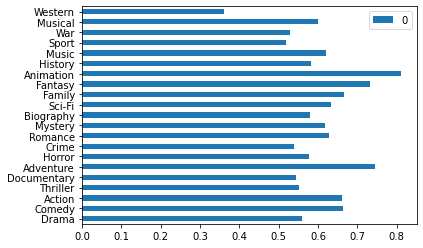

In [134]:
df_percentage = pd.DataFrame.from_dict(d3, orient= 'index')

df_percentage.plot.barh()



## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [27]:
# Here you run your code to model the data




## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***